/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/1437982509.py:79: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_f[-1], y_f[-1], color=colors[i], s=60, marker=markers['end'], edgecolor='black')
/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/1437982509.py:79: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_f[-1], y_f[-1], color=colors[i], s=60, marker=markers['end'], edgecolor='black')
/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/1437982509.py:79: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may chang

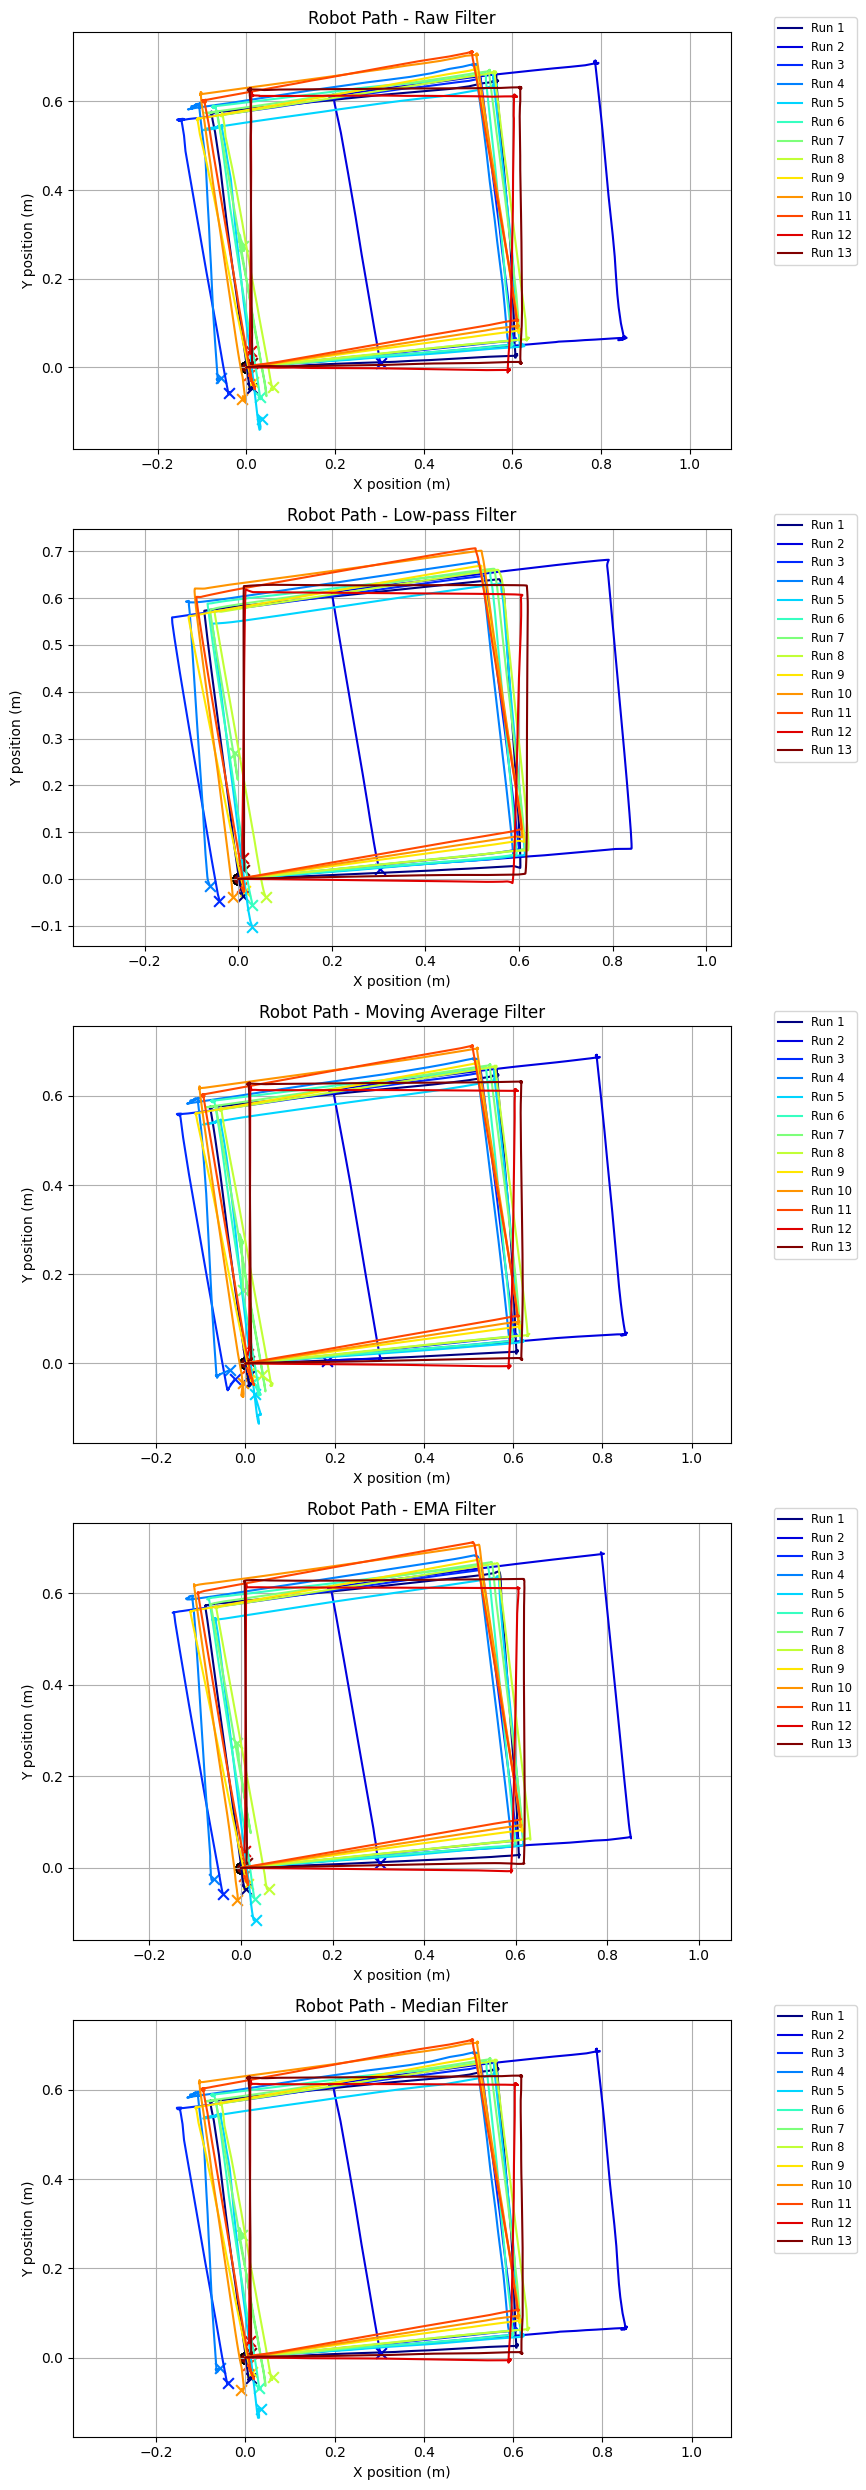

/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/1437982509.py:109: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_f[-1], y_f[-1], color=colors[i], s=80, marker=markers['end'], edgecolor='black')
/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/1437982509.py:109: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_f[-1], y_f[-1], color=colors[i], s=80, marker=markers['end'], edgecolor='black')
/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/1437982509.py:109: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may 

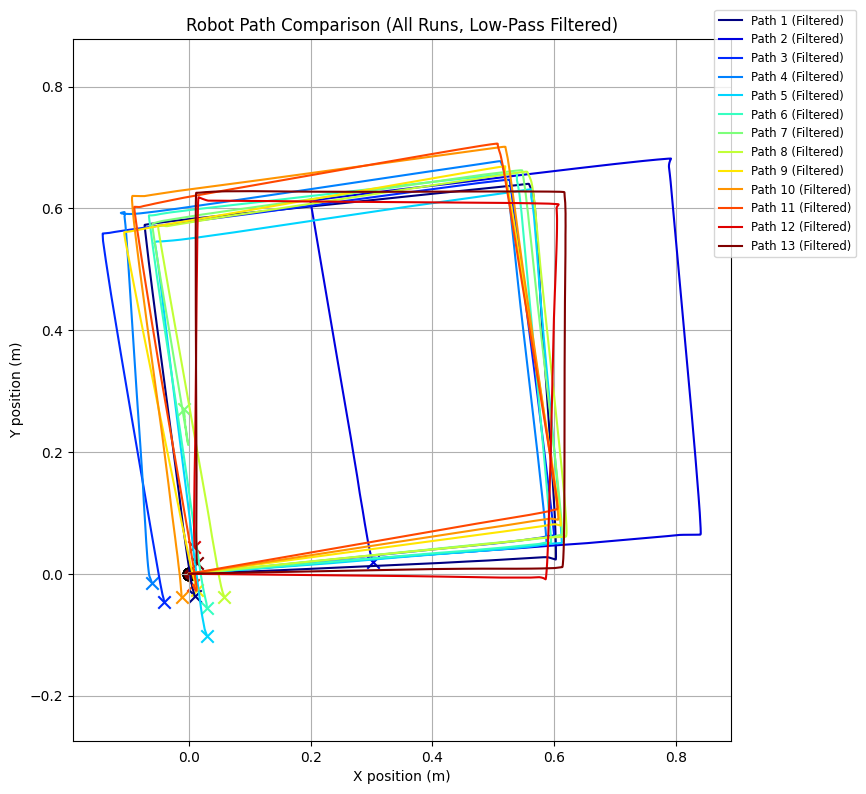

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import matplotlib.colors as mcolors

# === ฟังก์ชัน Low-Pass Filter ===
def low_pass_filter(data, alpha=0.05):
    filtered = np.zeros_like(data)
    filtered[0] = data[0]
    for i in range(1, len(data)):
        filtered[i] = alpha * data[i] + (1 - alpha) * filtered[i-1]
    return filtered

# === ฟิลเตอร์ Moving Average ===
def moving_average_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# === ฟิลเตอร์ Exponential Moving Average (EMA) ===
def ema_filter(data, alpha=0.1):
    ema = np.zeros_like(data)
    ema[0] = data[0]
    for i in range(1, len(data)):
        ema[i] = alpha * data[i] + (1 - alpha) * ema[i-1]
    return ema

# === ฟิลเตอร์ Median ===
def median_filter_custom(data, window_size=5):
    return median_filter(data, size=window_size)

# ใช้ไฟล์ทั้งหมดที่มี
files = [
    "robot_log_17_15_35_P3_I0-3_D12_ramp_ver.csv",
    "robot_log_17_16_28_P2-5_I0-3_D11_ramp_ver.csv",
    "robot_log_17_17_08_P2_I0-3_D10_ramp_ver.csv",
    "robot_log_17_41_41_P3_I0-3_D11_ramp0-3.csv",
    "robot_log_17_44_04_P3_I0-3_D11_ramp0-5.csv",
    "robot_log_17_44_50_P2-5_I0-3_D10_ramp0-3.csv",
    "robot_log_17_45_56_P2-5_I0-3_D10_ramp0-7.csv",
    "robot_log_17_46_43_P2-3_I0-3_D10_ramp0-7.csv",
    "robot_log_17_47_53_P2-3_I0-3_D10_ramp0-7.csv",
    "robot_log_17_48_30_P2-3_I0-3_D10_ramp0-7.csv",
    "robot_log_17_49_27_P2-3_I0-3_D10_ramp0-7.csv",
    "robot_log_17_51_29_P2-3_I0-3_D10_ramp0-7.csv",
    "robot_log_18_02_32_P2-1_I0-3_D10_ramp0-7.csv"
]

# ฟิลเตอร์ที่จะใช้
filters = {
    'Raw': lambda x: x,
    'Low-pass': lambda x: low_pass_filter(x, alpha=0.05),
    'Moving Average': lambda x: moving_average_filter(x, window_size=5),
    'EMA': lambda x: ema_filter(x, alpha=0.1),
    'Median': lambda x: median_filter_custom(x, window_size=5),
}

# สร้างสีแบบสุ่มสำหรับแต่ละไฟล์
num_files = len(files)
colors = plt.cm.jet(np.linspace(0, 1, num_files))
markers = {'start': 'o', 'end': 'x'}

# สร้าง subplot สำหรับแต่ละฟิลเตอร์
fig, axs = plt.subplots(len(filters), 1, figsize=(10, 5 * len(filters)))

for ax_idx, (filter_name, filter_func) in enumerate(filters.items()):
    ax = axs[ax_idx]
    for i, file in enumerate(files):
        df = pd.read_csv(file)
        x_raw = df['x'].fillna(0).values
        y_raw = df['y'].fillna(0).values
        
        # ใช้ฟิลเตอร์แต่ละแบบ
        x_f = filter_func(x_raw)
        y_f = filter_func(y_raw)
        
        # Plot ด้วยสีจากรายการที่สร้างขึ้น
        ax.plot(x_f, y_f, color=colors[i], label=f'Run {i+1}')
        ax.scatter(x_f[0], y_f[0], color=colors[i], s=60, marker=markers['start'], edgecolor='black')
        ax.scatter(x_f[-1], y_f[-1], color=colors[i], s=60, marker=markers['end'], edgecolor='black')
    
    ax.set_title(f'Robot Path - {filter_name} Filter')
    ax.set_xlabel('X position (m)')
    ax.set_ylabel('Y position (m)')
    ax.grid(True)
    ax.axis('equal')
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05), ncol=1, fontsize='small')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# --- ส่วนที่ 2: กราฟเปรียบเทียบเส้นทาง Low-pass filter แบบรวม 

plt.figure(figsize=(10, 8))

for i, file in enumerate(files):
    df = pd.read_csv(file)
    x_raw = df['x'].fillna(0).values
    y_raw = df['y'].fillna(0).values
    
    # Low-pass filter
    x_f = low_pass_filter(x_raw, alpha=0.05)
    y_f = low_pass_filter(y_raw, alpha=0.05)
    
    # Plot เส้นทาง
    plt.plot(x_f, y_f, label=f'Path {i+1} (Filtered)', color=colors[i])
    
    # จุดเริ่มต้นและจุดสิ้นสุด
    plt.scatter(x_f[0], y_f[0], color=colors[i], s=80, marker=markers['start'], edgecolor='black')
    plt.scatter(x_f[-1], y_f[-1], color=colors[i], s=80, marker=markers['end'], edgecolor='black')

plt.title('Robot Path Comparison (All Runs, Low-Pass Filtered)')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05), ncol=1, fontsize='small')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/3735181548.py:65: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_f[-1], y_f[-1], color=colors[i], s=60, marker=markers['end'], edgecolor='black')
/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/3735181548.py:65: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_f[-1], y_f[-1], color=colors[i], s=60, marker=markers['end'], edgecolor='black')
/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_5000/3735181548.py:65: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may chang

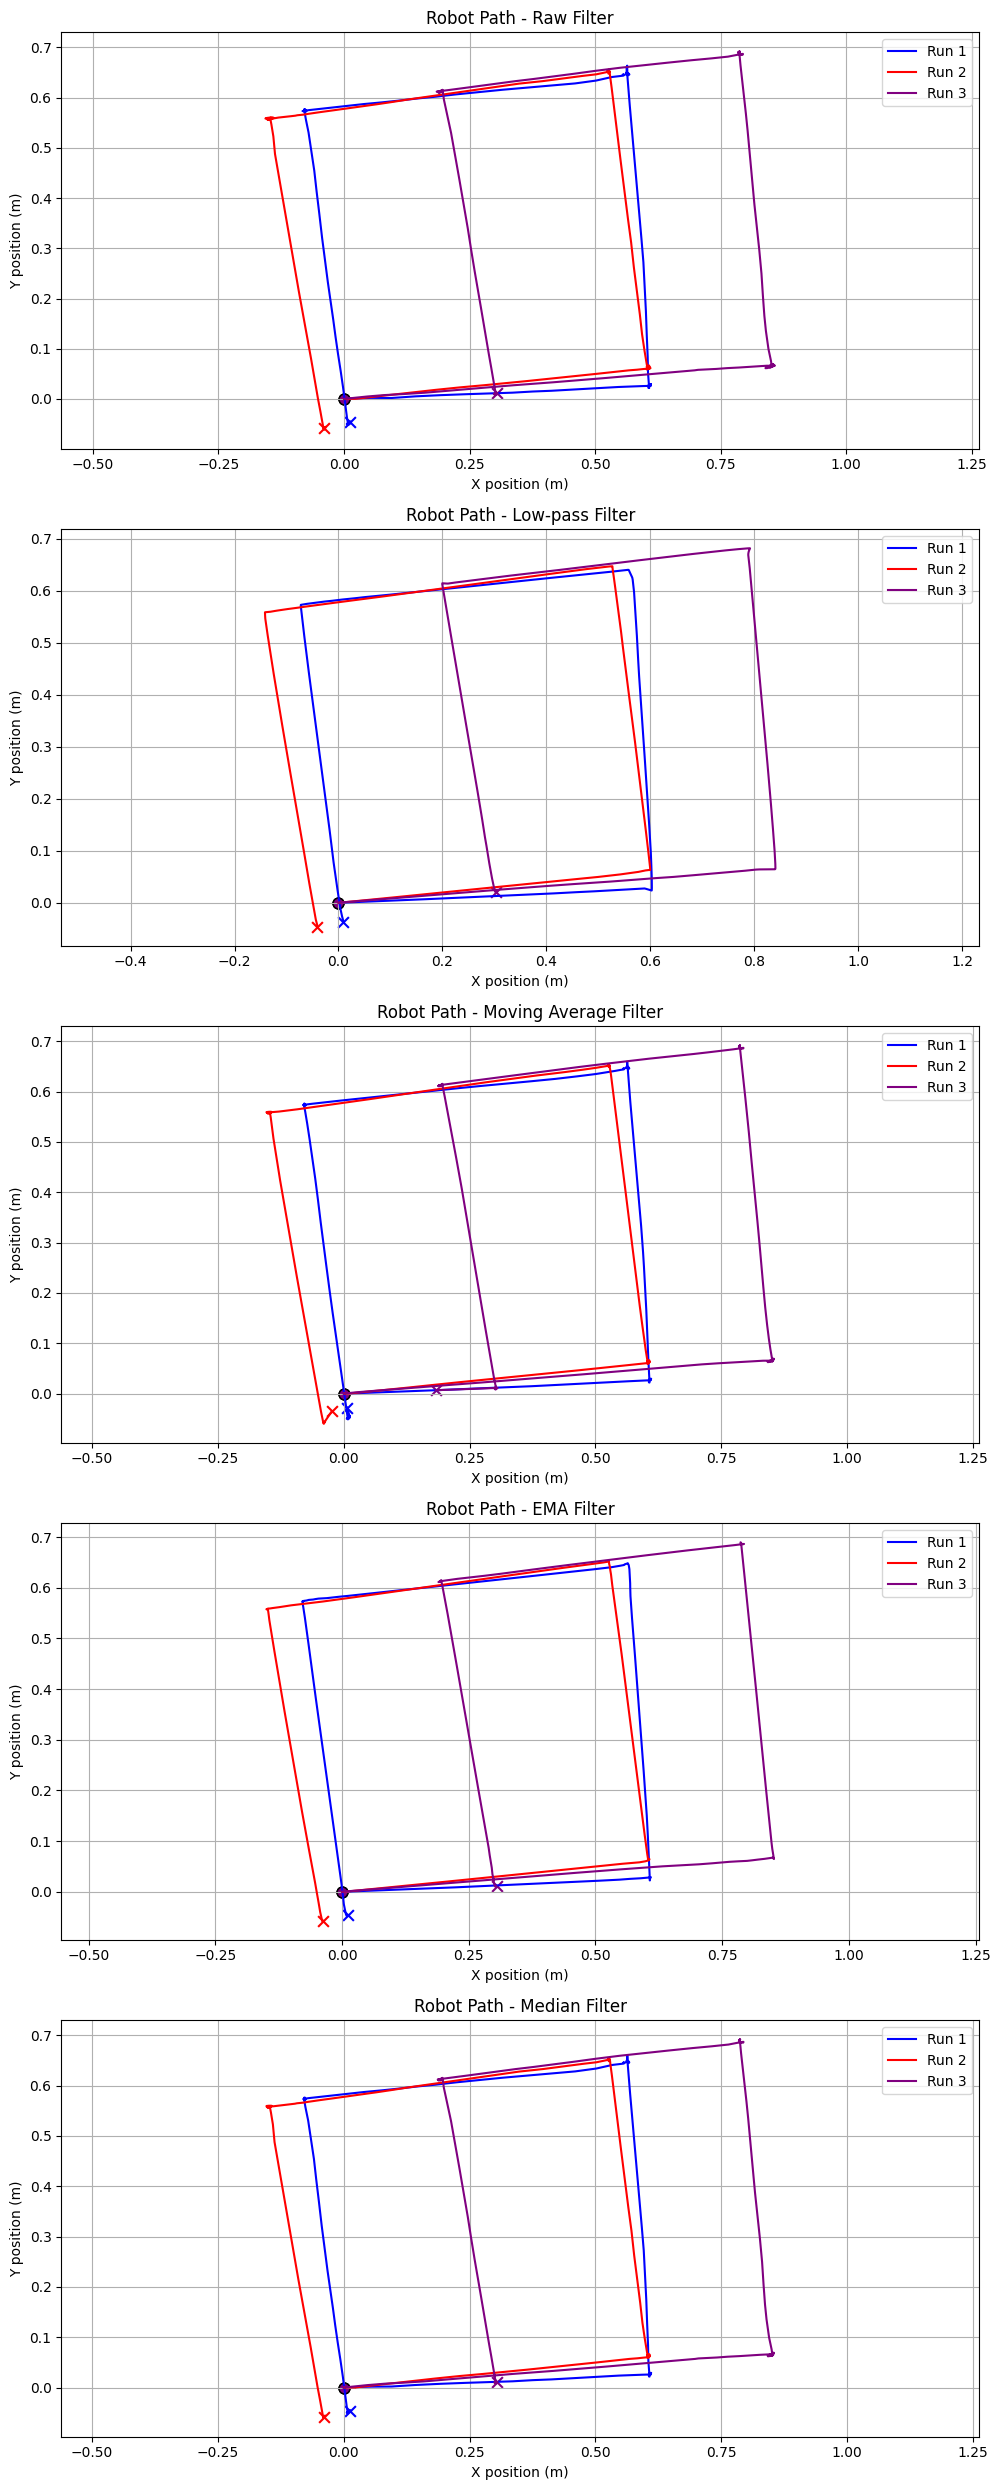